<a href="https://colab.research.google.com/github/snow-white2024/AIFFEL_quest_cr/blob/master/%EC%88%98%EC%8B%9D_%EC%97%86%EC%9D%B4%EB%8F%84_%EC%9D%B4%ED%95%B4%ED%95%A0_%EC%88%98_%EC%9E%88%EB%8A%94_ChatGPT%EC%99%80_Stable_Diffusion_%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

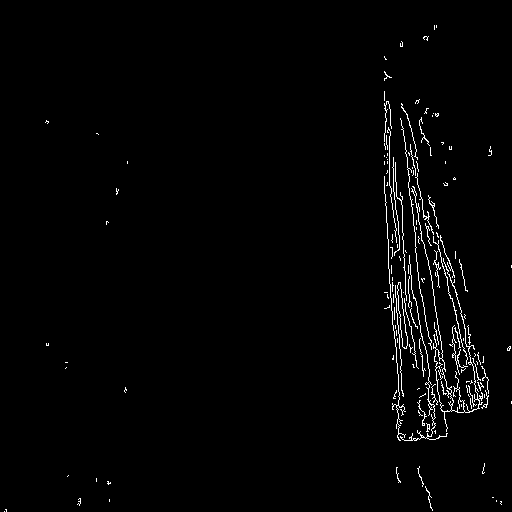

In [6]:
from diffusers.utils import load_image
from PIL import Image
import cv2
import numpy as np
from IPython.display import display
# 이미지를 불러오세요.
canny_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")  # [[YOUR CODE]]: 이미지 경로를 지정하세요.
canny_image = canny_image.convert("L")  # [[YOUR CODE]]: 흑백(그레이스케일)으로 변환

# Threshold를 지정합니다.
low_threshold = 100  # [[YOUR CODE]]
high_threshold = 200  # [[YOUR CODE]]

# 이미지를 NumPy 배열로 변환합니다.
canny_image = np.array(canny_image)  # [[YOUR CODE]]

# Canny 엣지 검출 적용
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = Image.fromarray(canny_image)  # [[YOUR CODE]]
canny_image = canny_image.convert("RGB")  # [[YOUR CODE]]: 다시 RGB로 변환하여 저장 가능하도록 변경

# 생성된 이미지를 출력
canny_image.show()  # [[YOUR CODE]]: 이미지 확인
display(canny_image)

In [4]:
!pip install controlnet_aux

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.4/282.4 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.0/510.0 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

/usr/local/lib/python3.11/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


body_pose_model.pth:   0%|          | 0.00/209M [00:00<?, ?B/s]

hand_pose_model.pth:   0%|          | 0.00/147M [00:00<?, ?B/s]

facenet.pth:   0%|          | 0.00/154M [00:00<?, ?B/s]

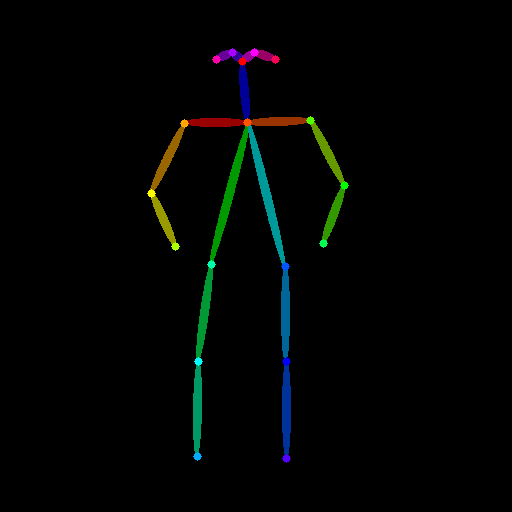

In [7]:
from controlnet_aux import OpenposeDetector
from diffusers.utils import load_image

# Q. 아래의 코드를 작성해 주세요.
# 이미지를 불러옵니다.
openpose_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png"
)

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)
openpose_image

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

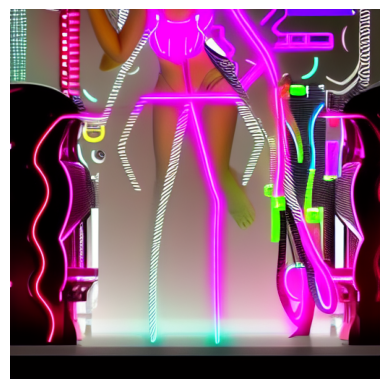

In [7]:
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# 이미지를 불러옵니다.
openpose_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

# Canny 엣지 검출을 위한 이미지 처리
canny_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")
canny_image = canny_image.convert("L")  # 그레이스케일로 변환
canny_image = np.array(canny_image)  # NumPy 배열로 변환

# Canny 엣지 검출
low_threshold = 100
high_threshold = 200
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = Image.fromarray(canny_image)
canny_image = canny_image.convert("RGB")

# controlnets 리스트 정의
controlnets = [
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny"),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose")
]

# 파이프라인 생성
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트 설정
prompt = "A futuristic cyberpunk dancer with neon lights"
negative_prompt = "blurry, low quality, distorted"

# seed 설정
import torch
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
    generator=generator,
    image=[openpose_image, canny_image]  # OpenPose와 Canny 이미지 입력
).images[0]

# 생성된 이미지를 파일로 저장
image.save("/content/generated_image.png")

# 저장된 이미지를 Matplotlib으로 시각화
image_path = "/content/generated_image.png"
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

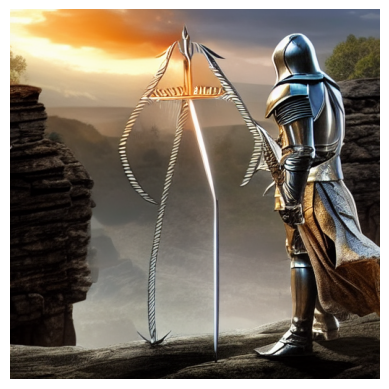

In [9]:
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# 이미지를 불러옵니다.
openpose_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

# Canny 엣지 검출을 위한 이미지 처리
canny_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")
canny_image = canny_image.convert("L")  # 그레이스케일로 변환
canny_image = np.array(canny_image)  # NumPy 배열로 변환

# Canny 엣지 검출
low_threshold = 100
high_threshold = 200
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = Image.fromarray(canny_image)
canny_image = canny_image.convert("RGB")

# controlnets 리스트 정의
controlnets = [
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny"),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose")
]

# 파이프라인 생성
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트 설정
prompt = "A fearless medieval knight clad in silver armor, wielding a massive enchanted sword, standing atop a rocky cliff overlooking a misty battlefield at sunrise."
negative_prompt = "blurry, low quality, distorted"

# seed 설정
import torch
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
    generator=generator,
    image=[openpose_image, canny_image]  # OpenPose와 Canny 이미지 입력
).images[0]

# 생성된 이미지를 파일로 저장
image.save("/content/generated_image.png")

# 저장된 이미지를 Matplotlib으로 시각화
image_path = "/content/generated_image.png"
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

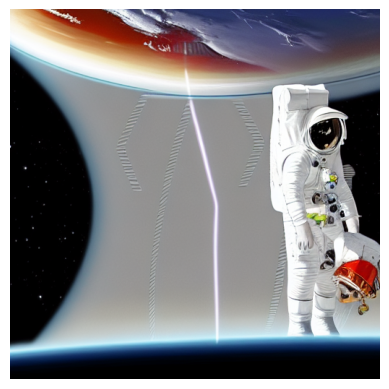

In [10]:
from diffusers.utils import load_image
from controlnet_aux import OpenposeDetector
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# 이미지를 불러옵니다.
openpose_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/person.png")

# OpenposeDetector를 사용하여 인체 자세를 검출합니다.
openpose = OpenposeDetector.from_pretrained("lllyasviel/ControlNet")
openpose_image = openpose(openpose_image)

# Canny 엣지 검출을 위한 이미지 처리
canny_image = load_image("https://hf.co/datasets/huggingface/documentation-images/resolve/main/diffusers/input_image_vermeer.png")
canny_image = canny_image.convert("L")  # 그레이스케일로 변환
canny_image = np.array(canny_image)  # NumPy 배열로 변환

# Canny 엣지 검출
low_threshold = 100
high_threshold = 200
canny_image = cv2.Canny(canny_image, low_threshold, high_threshold)

# 인체 감지 포즈를 넣어줄 가운데 부분을 지워줍니다.
zero_start = canny_image.shape[1] // 4
zero_end = zero_start + canny_image.shape[1] // 2
canny_image[:, zero_start:zero_end] = 0

# 윤곽선을 검출하고 NumPy 배열을 PIL 이미지로 변환합니다.
canny_image = Image.fromarray(canny_image)
canny_image = canny_image.convert("RGB")

# controlnets 리스트 정의
controlnets = [
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-canny"),
    ControlNetModel.from_pretrained("lllyasviel/sd-controlnet-openpose")
]

# 파이프라인 생성
pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnets
)

pipe.scheduler = UniPCMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")

# 프롬프트 설정
prompt = "A lone astronaut in a sleek white spacesuit, floating near a giant gas planet with swirling clouds and multiple moons, while a distant spaceship glows in the background."
negative_prompt = "blurry, low quality, distorted"

# seed 설정
import torch
generator = torch.manual_seed(0)

# 이미지를 생성합니다.
image = pipe(
    prompt=prompt,
    negative_prompt=negative_prompt,
    num_inference_steps=20,
    generator=generator,
    image=[openpose_image, canny_image]  # OpenPose와 Canny 이미지 입력
).images[0]

# 생성된 이미지를 파일로 저장
image.save("/content/generated_image.png")

# 저장된 이미지를 Matplotlib으로 시각화
image_path = "/content/generated_image.png"
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()